# Importing Nescessary Lib

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Importing Dataset

In [108]:
df = pd.read_csv('dataset.csv')

# Initial Look into dataframe

In [109]:
df.head()

,material,gLen_µm,freq_Ghz,gain_dB,noise_dB,Pdc_mW,bandwidth_GHz,lna_arch
0,GaN,0.25,2.4,12.0,1.35,2.0,0.9,Foldedcascode
1,GaN,0.15,3.5,17.0,1.00,NaN,1.0,NaN
2,GaN,0.10,60.0,12.0,2.50,NaN,NaN,Cascode
3,GaN,0.25,10.0,15.2,1.80,182.0,2.0,NaN
4,GaN,0.15,94.0,18.0,3.50,120.0,14.0,3stage


In [110]:
df.shape

(524, 8)

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   material       524 non-null    object 
 1   gLen_µm        519 non-null    float64
 2   freq_Ghz       524 non-null    float64
 3   gain_dB        524 non-null    float64
 4   noise_dB       515 non-null    float64
 5   Pdc_mW         403 non-null    float64
 6   bandwidth_GHz  441 non-null    float64
 7   lna_arch       418 non-null    object 
dtypes: float64(6), object(2)
memory usage: 32.9+ KB


In [112]:
df.describe()

,gLen_µm,freq_Ghz,gain_dB,noise_dB,Pdc_mW,bandwidth_GHz
count,519.000000,524.000000,524.000000,515.000000,403.000000,441.000000
mean,0.148998,30.590677,17.477252,2.313111,101.778412,10.299410
std,0.054100,34.054872,4.211013,1.398562,49.325190,10.047582
min,0.050000,0.500000,7.000000,0.350000,2.000000,0.100000
25%,0.100000,4.975000,15.000000,1.200000,70.000000,4.000000
50%,0.150000,15.750000,17.000000,2.000000,98.000000,8.000000
75%,0.150000,42.625000,20.000000,3.000000,127.000000,15.000000
max,0.500000,180.000000,30.000000,7.000000,280.000000,80.000000


In [113]:
df.isnull().sum()

material           0
gLen_µm            5
freq_Ghz           0
gain_dB            0
noise_dB           9
Pdc_mW           121
bandwidth_GHz     83
lna_arch         106
dtype: int64

# Removing Duplicates

In [114]:
df.duplicated().sum()

1

In [115]:
df.drop_duplicates(inplace=True)

# Calculate the median for numerical columns (having null)

In [116]:
glen_median = df['gLen_µm'].median()
noise_median = df['noise_dB'].median()

# Fill null values with the calculated median

In [117]:
df['gLen_µm'].fillna(glen_median, inplace=True)
df['noise_dB'].fillna(noise_median, inplace=True)

print("Nulls filled for gLen_µm and noise_dB.")

Nulls filled for gLen_µm and noise_dB.


In [118]:
df.isnull().sum()

material           0
gLen_µm            0
freq_Ghz           0
gain_dB            0
noise_dB           0
Pdc_mW           120
bandwidth_GHz     83
lna_arch         106
dtype: int64

# Fill null values in lna_arch with the string 'Unknown'

In [119]:
df['lna_arch'].fillna('Unknown', inplace=True)

print("Nulls in lna_arch replaced with 'Unknown'.")

Nulls in lna_arch replaced with 'Unknown'.


In [120]:
df.isnull().sum()

material           0
gLen_µm            0
freq_Ghz           0
gain_dB            0
noise_dB           0
Pdc_mW           120
bandwidth_GHz     83
lna_arch           0
dtype: int64

# Visualization for Numerical Columns

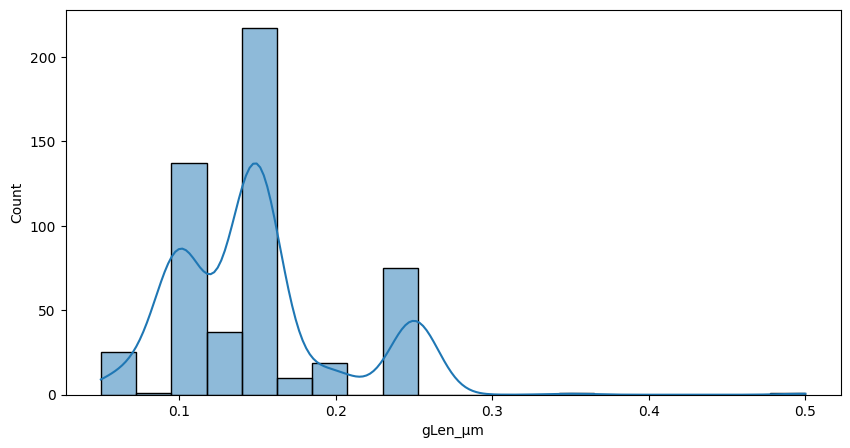

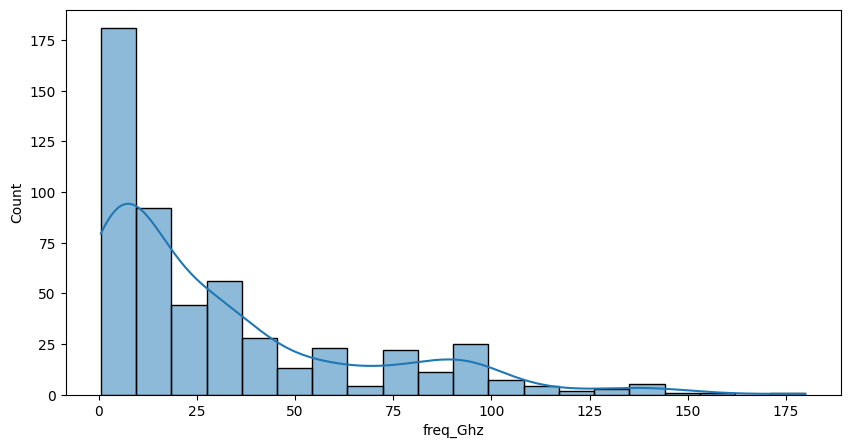

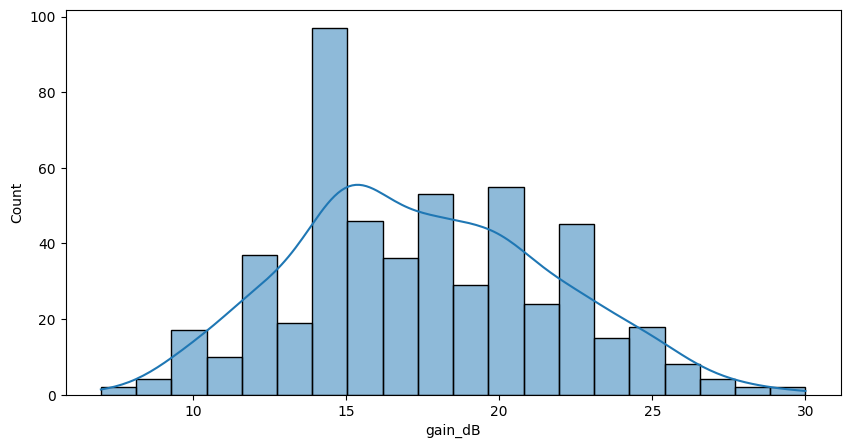

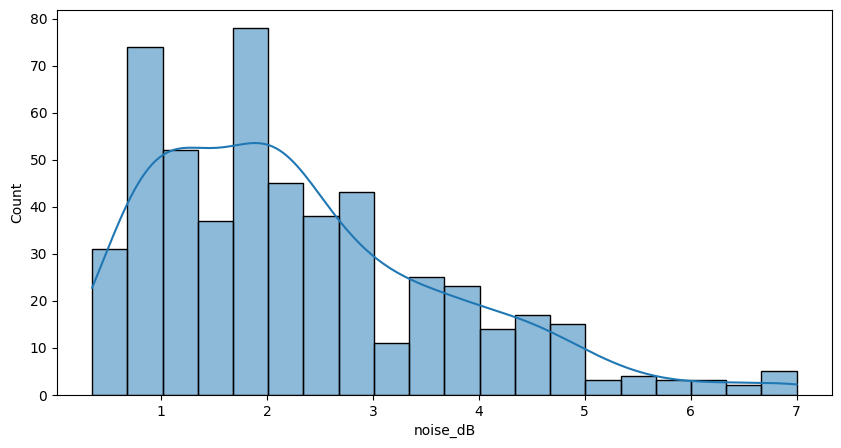

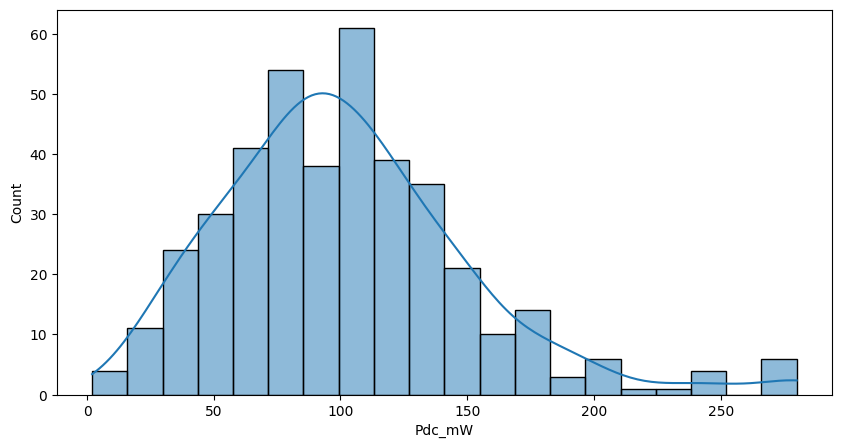

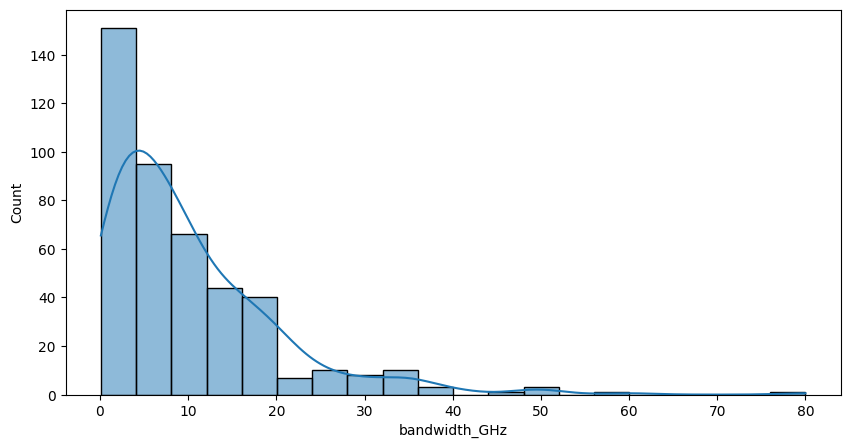

In [121]:
numeric_columns = ['gLen_µm', 'freq_Ghz' , 'gain_dB' , 'noise_dB' , 'Pdc_mW', 'bandwidth_GHz']
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=20)

# Visualization for Categorical Data

<Axes: xlabel='material', ylabel='count'>

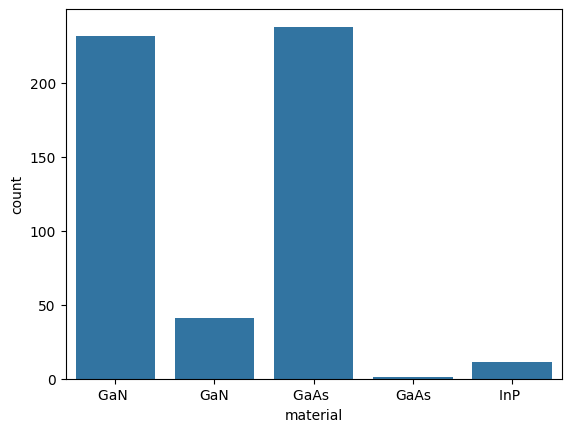

In [122]:
sns.countplot(x = df['material'])

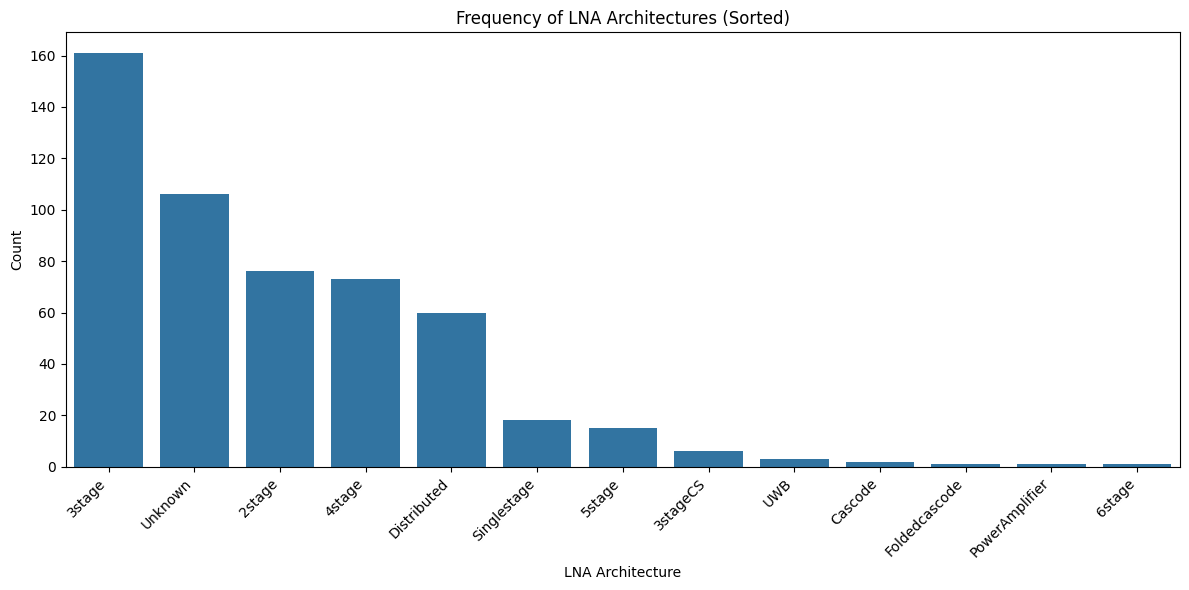

In [123]:
# Set the figure size to make room for labels
plt.figure(figsize=(12, 6))

# Use the 'order' parameter in countplot to sort by the value counts
sns.countplot(
    x='lna_arch',
    data=df,
    color='tab:blue',  # Use a single color for clarity
    order=df['lna_arch'].value_counts().index  # This is the key for sorting!
)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of LNA Architectures (Sorted)')
plt.xlabel('LNA Architecture')
plt.ylabel('Count')
plt.tight_layout()  # Adjusts plot to ensure everything fits
plt.show()

# Clean the Cateogries

In [124]:
# Trim and standardize
df['material'] = df['material'].str.strip().str.upper()

# Replace known typos
df['material'] = df['material'].replace({
    'GAN': 'GaN',
    'GAAS': 'GaAs'
})

# Drop InP
df = df[df['material'] != 'INP']

<Axes: xlabel='material', ylabel='count'>

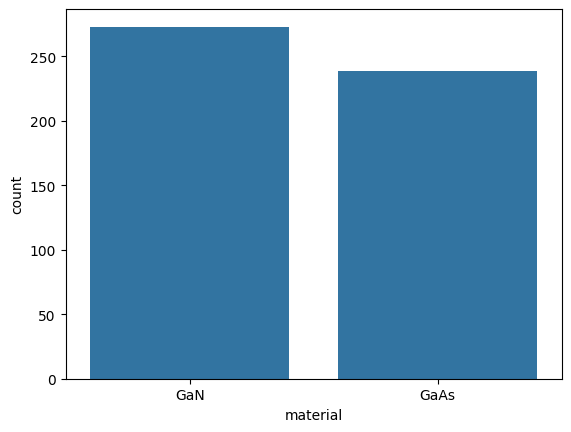

In [125]:
sns.countplot(x = df['material'])

In [126]:
df.describe()

,gLen_µm,freq_Ghz,gain_dB,noise_dB,Pdc_mW,bandwidth_GHz
count,512.000000,512.000000,512.000000,512.000000,395.000000,429.000000
mean,0.150547,28.883818,17.535312,2.265141,102.358734,9.659767
std,0.053350,31.869351,4.215989,1.358717,49.632089,8.958053
min,0.050000,0.500000,7.000000,0.350000,2.000000,0.100000
25%,0.100000,4.800000,15.000000,1.200000,70.000000,4.000000
50%,0.150000,15.000000,17.000000,2.000000,100.000000,8.000000
75%,0.150000,39.125000,20.000000,3.000000,129.000000,14.000000
max,0.500000,150.000000,30.000000,7.000000,280.000000,60.000000


# BoxPlot for Numeric Data

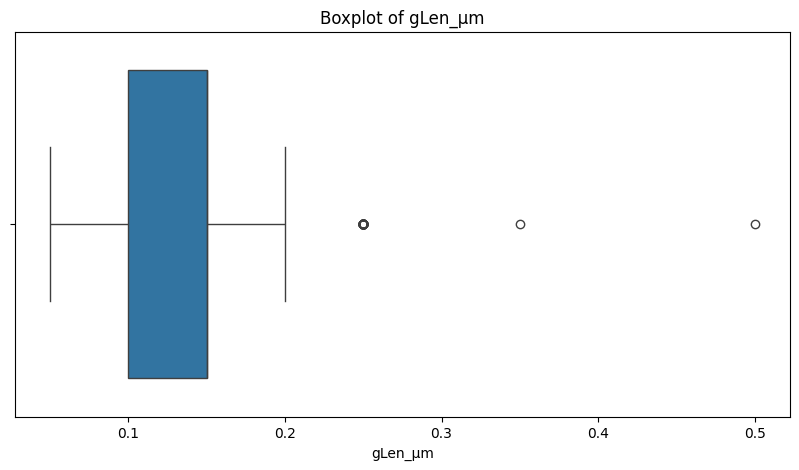

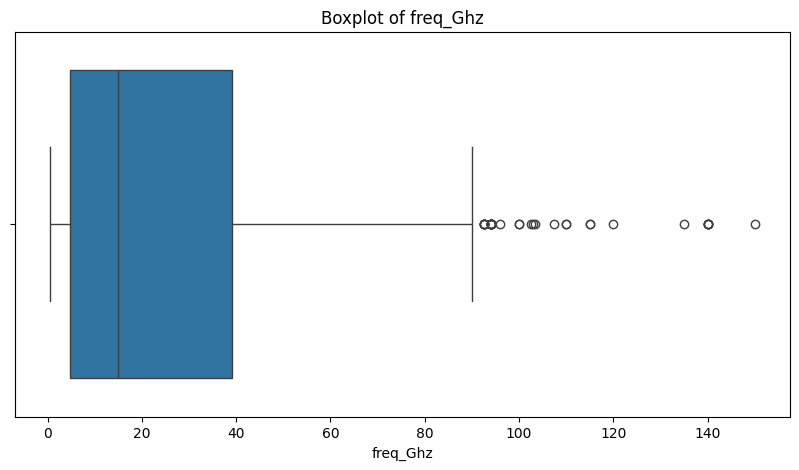

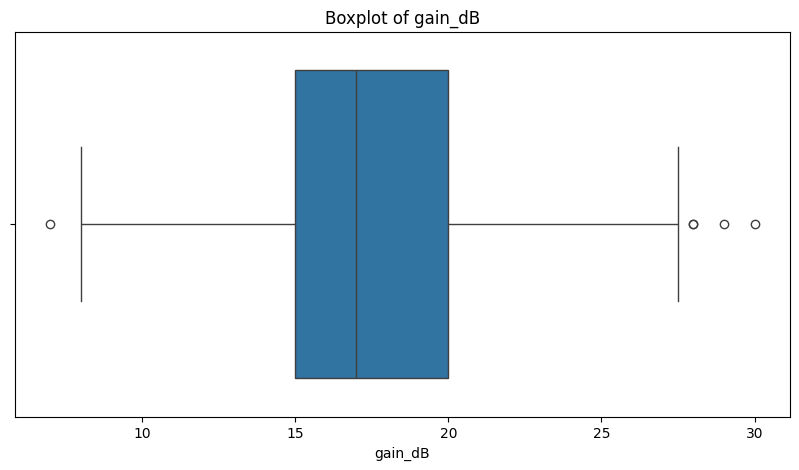

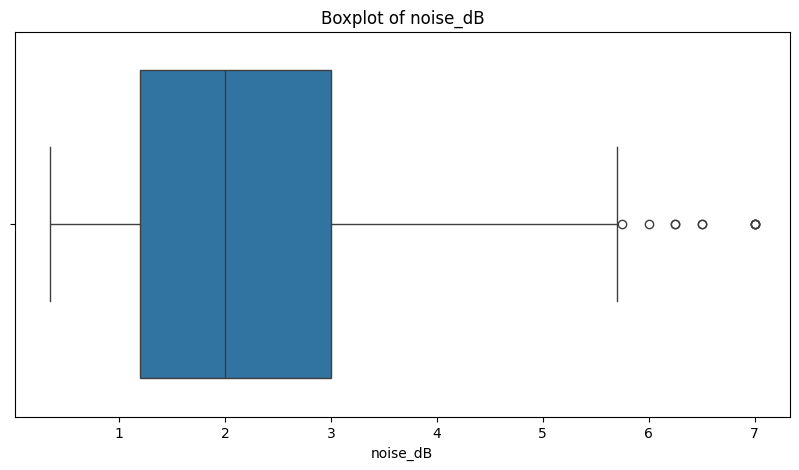

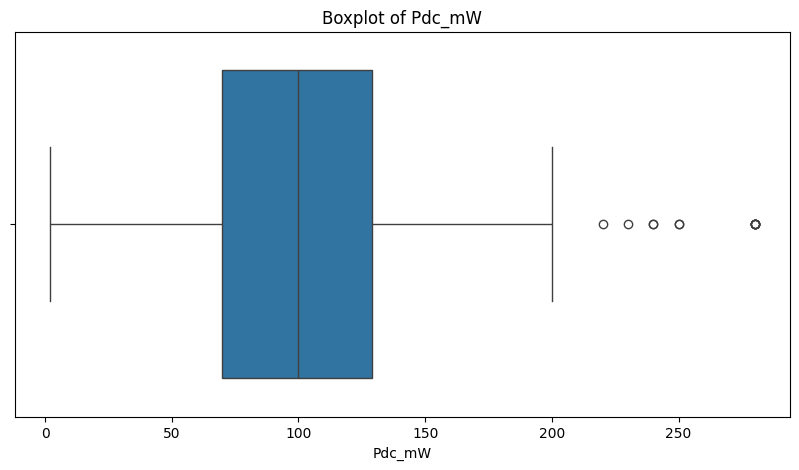

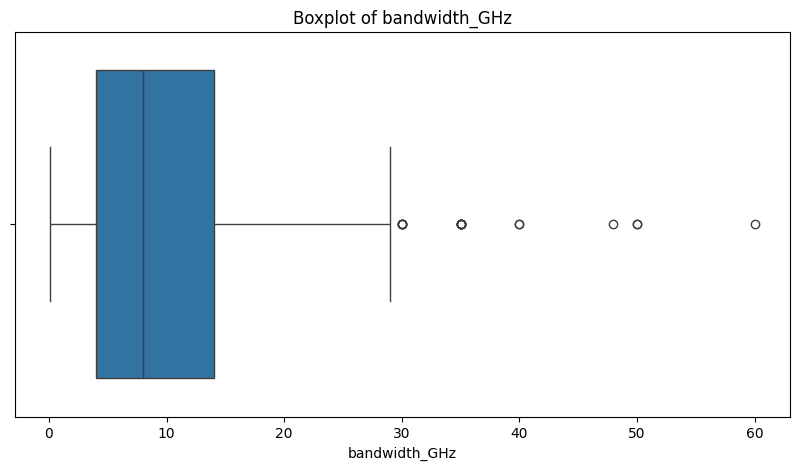

In [127]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation

<Axes: >

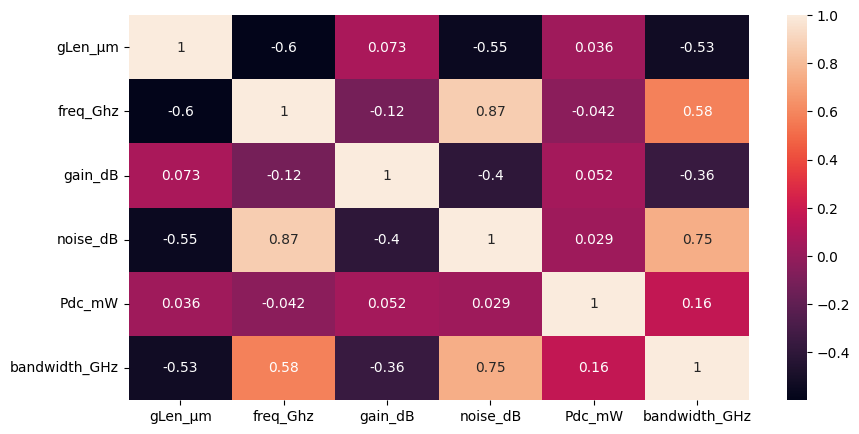

In [128]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Create a new dataframe without the Pdc_mW column

In [129]:
df_cleaned = df.drop('Pdc_mW', axis=1)

# You can verify it's gone
print(df_cleaned.head())

  material  gLen_µm  freq_Ghz  gain_dB  noise_dB  bandwidth_GHz       lna_arch
0      GaN     0.25       2.4     12.0      1.35            0.9  Foldedcascode
1      GaN     0.15       3.5     17.0      1.00            1.0        Unknown
2      GaN     0.10      60.0     12.0      2.50            NaN        Cascode
3      GaN     0.25      10.0     15.2      1.80            2.0        Unknown
4      GaN     0.15      94.0     18.0      3.50           14.0         3stage


# Handling Nulls in bandwidth_GHz

In [130]:
# Calculate the median for the 'bandwidth_GHz' column
bandwidth_median = df_cleaned['bandwidth_GHz'].median()

# Fill the null values in place
df_cleaned['bandwidth_GHz'].fillna(bandwidth_median, inplace=True)

#Verify that the nulls are gone
print("Null values remaining in 'bandwidth_GHz':", df_cleaned['bandwidth_GHz'].isnull().sum())
print("\nCleaned DataFrame head:")
print(df_cleaned.head())

Null values remaining in 'bandwidth_GHz': 0

Cleaned DataFrame head:
  material  gLen_µm  freq_Ghz  gain_dB  noise_dB  bandwidth_GHz       lna_arch
0      GaN     0.25       2.4     12.0      1.35            0.9  Foldedcascode
1      GaN     0.15       3.5     17.0      1.00            1.0        Unknown
2      GaN     0.10      60.0     12.0      2.50            8.0        Cascode
3      GaN     0.25      10.0     15.2      1.80            2.0        Unknown
4      GaN     0.15      94.0     18.0      3.50           14.0         3stage


# Label Encoding of 'material'

In [131]:
from sklearn.preprocessing import LabelEncoder

# Ensure the material column is uppercase BEFORE fitting the encoder.
# This makes our entire pipeline robust to case variations.
df_cleaned['material_upper'] = df_cleaned['material'].str.upper()

# Initialize a new encoder
le = LabelEncoder()

# Fit and transform the UPPERCASE column
df_cleaned['material'] = le.fit_transform(df_cleaned['material_upper'])

# We don't need the temporary uppercase column anymore
df_cleaned = df_cleaned.drop('material_upper', axis=1)


print("--- 'material' column after CORRECTED Label Encoding ---")
print(df_cleaned.head())
print("\nMapping of new values:")
# Now the classes will be ['GAAS', 'GAN']
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")

--- 'material' column after CORRECTED Label Encoding ---
   material  gLen_µm  freq_Ghz  gain_dB  noise_dB  bandwidth_GHz  \
0         1     0.25       2.4     12.0      1.35            0.9   
1         1     0.15       3.5     17.0      1.00            1.0   
2         1     0.10      60.0     12.0      2.50            8.0   
3         1     0.25      10.0     15.2      1.80            2.0   
4         1     0.15      94.0     18.0      3.50           14.0   

        lna_arch  
0  Foldedcascode  
1        Unknown  
2        Cascode  
3        Unknown  
4         3stage  

Mapping of new values:
GAAS -> 0
GAN -> 1


# Handle Null in LNA Architecture

In [132]:
# Replace the string "Unknown" with actual NaN
df['lna_arch'] = df['lna_arch'].replace("Unknown", np.nan)

# Now fill those NaNs with the most frequent category
df['lna_arch'] = df['lna_arch'].fillna('3stage')

In [133]:
df_cleaned.isnull().sum()

material         0
gLen_µm          0
freq_Ghz         0
gain_dB          0
noise_dB         0
bandwidth_GHz    0
lna_arch         0
dtype: int64

# One Hot Encoding in LNA Architecture

In [134]:
# Get Dummies
df_processed = pd.get_dummies(df_cleaned, columns=['lna_arch'], drop_first=True)

print("\n DataFrame after One-Hot Encoding 'lna_arch' ---")
# Display the head of the final, fully processed dataframe
# 'material' is now a number and 'lna_arch' is gone,
# replaced by new columns like lna_arch_3stage, lna_arch_Cascode, etc.
print(df_processed.head())


 DataFrame after One-Hot Encoding 'lna_arch' ---
   material  gLen_µm  freq_Ghz  gain_dB  noise_dB  bandwidth_GHz  \
0         1     0.25       2.4     12.0      1.35            0.9   
1         1     0.15       3.5     17.0      1.00            1.0   
2         1     0.10      60.0     12.0      2.50            8.0   
3         1     0.25      10.0     15.2      1.80            2.0   
4         1     0.15      94.0     18.0      3.50           14.0   

   lna_arch_3stage  lna_arch_3stageCS  lna_arch_4stage  lna_arch_5stage  \
0            False              False            False            False   
1            False              False            False            False   
2            False              False            False            False   
3            False              False            False            False   
4             True              False            False            False   

   lna_arch_6stage  lna_arch_Cascode  lna_arch_Distributed  \
0            False          

In [135]:
df_final = df_processed.copy()
del df_cleaned

In [136]:
df_final.head()

,material,gLen_µm,freq_Ghz,gain_dB,noise_dB,bandwidth_GHz,lna_arch_3stage,lna_arch_3stageCS,lna_arch_4stage,lna_arch_5stage,lna_arch_6stage,lna_arch_Cascode,lna_arch_Distributed,lna_arch_Foldedcascode,lna_arch_PowerAmplifier,lna_arch_Singlestage,lna_arch_UWB,lna_arch_Unknown
0,1,0.25,2.4,12.0,1.35,0.9,False,False,False,False,False,False,False,True,False,False,False,False
1,1,0.15,3.5,17.0,1.00,1.0,False,False,False,False,False,False,False,False,False,False,False,True
2,1,0.10,60.0,12.0,2.50,8.0,False,False,False,False,False,True,False,False,False,False,False,False
3,1,0.25,10.0,15.2,1.80,2.0,False,False,False,False,False,False,False,False,False,False,False,True
4,1,0.15,94.0,18.0,3.50,14.0,True,False,False,False,False,False,False,False,False,False,False,False


# Standardizing and Scaling

In [137]:
from sklearn.preprocessing import StandardScaler

df_to_process = df_final.copy()

# --- Convert Boolean Dummies to Integers ---
ohe_cols = [col for col in df_to_process.columns if 'lna_arch_' in col]
df_to_process[ohe_cols] = df_to_process[ohe_cols].astype(int)

# --- Standardize and Scale ONLY the FEATURE Columns ---

# Identify the numerical features to scale.
numeric_features_to_scale = ['gLen_µm', 'freq_Ghz', 'bandwidth_GHz']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to ONLY the feature columns and transform them in the DataFrame
df_to_process[numeric_features_to_scale] = scaler.fit_transform(df_to_process[numeric_features_to_scale])

print("\n--- Final DataFrame after CORRECTED Scaling ---")
print(df_to_process.head())


--- Final DataFrame after CORRECTED Scaling ---
   material   gLen_µm  freq_Ghz  gain_dB  noise_dB  bandwidth_GHz  \
0         1  1.865969 -0.831825     12.0      1.35      -1.033797   
1         1 -0.010261 -0.797275     17.0      1.00      -1.021621   
2         1 -0.948376  0.977322     12.0      2.50      -0.169327   
3         1  1.865969 -0.593118     15.2      1.80      -0.899865   
4         1 -0.010261  2.045221     18.0      3.50       0.561211   

   lna_arch_3stage  lna_arch_3stageCS  lna_arch_4stage  lna_arch_5stage  \
0                0                  0                0                0   
1                0                  0                0                0   
2                0                  0                0                0   
3                0                  0                0                0   
4                1                  0                0                0   

   lna_arch_6stage  lna_arch_Cascode  lna_arch_Distributed  \
0                0     

# Saving Scaler Objects

In [138]:
import joblib

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder object for 'material'
joblib.dump(le, 'label_encoder.pkl')

print("Scaler and Label Encoder have been saved to 'scaler.pkl' and 'label_encoder.pkl'.")

Scaler and Label Encoder have been saved to 'scaler.pkl' and 'label_encoder.pkl'.


# Save the final, clean dataframe to a new CSV file

In [139]:
df_to_process.to_csv('processed_lna_dataset.csv', index=False)

# Note: Using index=False is important. It prevents pandas from writing the DataFrame index as a new column in your CSV file.

print("\nFully processed data saved to 'processed_lna_dataset.csv'")


Fully processed data saved to 'processed_lna_dataset.csv'
